# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice.
unique_mice_count = len(combined_data['Mouse ID'].unique())
unique_mice_count

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_ids)]
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice_count = len(clean_mice_data['Mouse ID'].unique())
clean_unique_mice_count

248

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_values = grouped_data['Tumor Volume (mm3)'].mean()
median_values = grouped_data['Tumor Volume (mm3)'].median()
variance_values = grouped_data['Tumor Volume (mm3)'].var()
std_deviation_values = grouped_data['Tumor Volume (mm3)'].std()
sem_values = grouped_data['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values,
    'SEM': sem_values})
summary_statistics

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

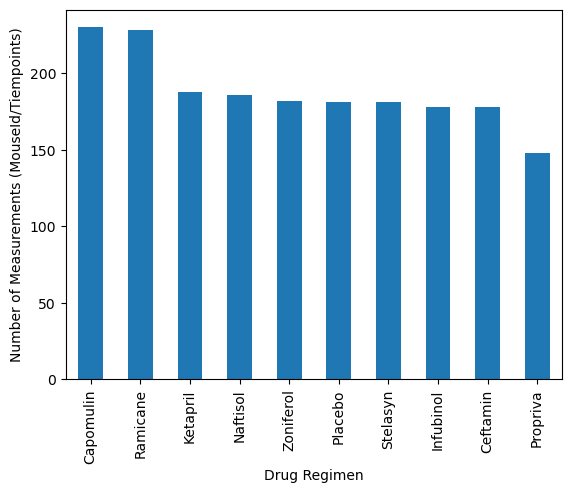

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
x = clean_mice_data['Drug Regimen'].value_counts()

bar_chart = x.plot(kind='bar')

bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Measurements (MouseId/Tiempoints)")

plt.show()

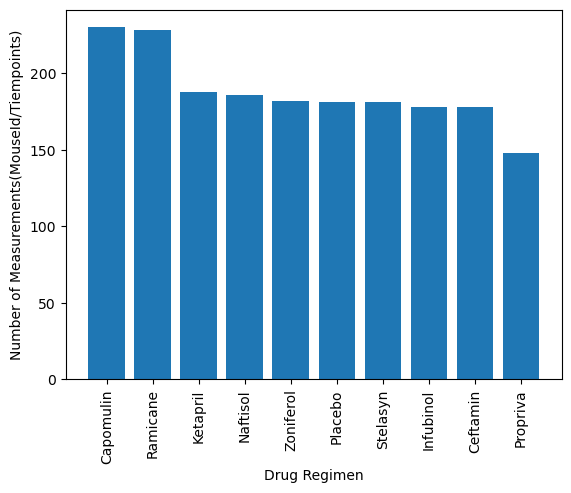

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=x.index, height=x.values)

plt.xlabel('Drug Regimen')
plt.ylabel("Number of Measurements(MouseId/Tiempoints)")
plt.xticks(rotation=90)

plt.show()

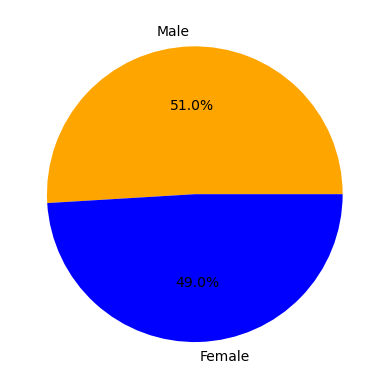

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_gender_distribution = clean_mice_data['Sex'].value_counts()

pandas_pie_chart = pandas_gender_distribution.plot(kind='pie', autopct='%1.1f%%',
                                         startangle=0, colors=['orange', 'blue'], 
                                         ylabel='')
plt.show()

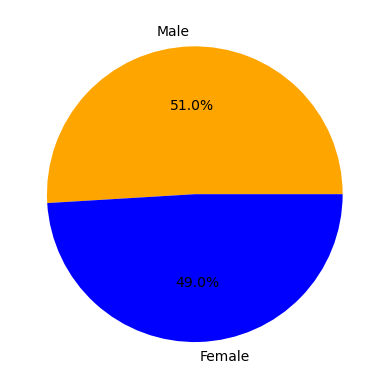

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pandas_gender_distribution.values, labels=pandas_gender_distribution.index, autopct='%1.1f%%', 
        startangle=0, colors=['orange', 'blue'])
plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(clean_mice_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments:

# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(tumor_vol)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = quartiles[0.5]
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

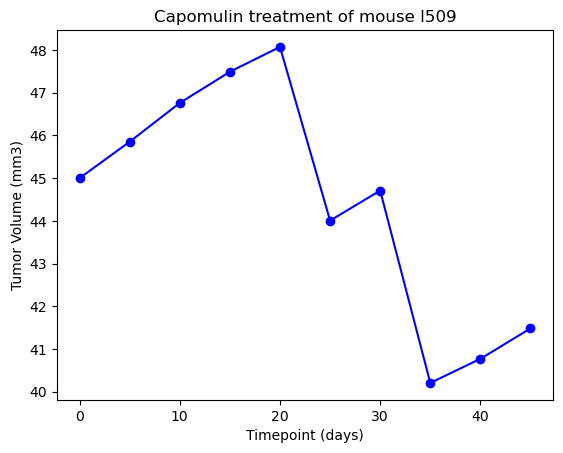

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_mice_data[clean_mice_data['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
capomulin_mouse_data = capomulin_mouse[capomulin_mouse['Mouse ID'] == mouse_id]


plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.xlabel('Timepoint (days)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.show()

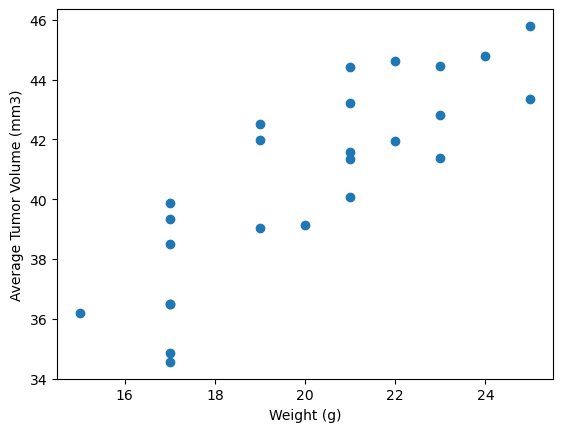

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avgerage = capomulin_mouse.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.scatter(capomulin_avgerage['Weight (g)'], capomulin_avgerage['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')  
plt.ylabel('Average Tumor Volume (mm3)')   

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


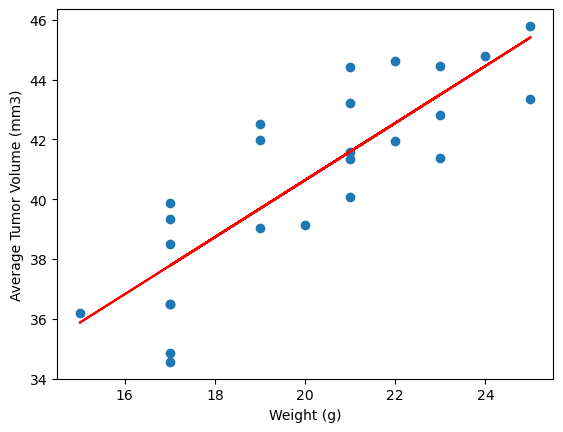

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
                                                           
                                                         